In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the file into a DataFrame
apple_quality = pd.read_csv("apple_quality.csv")

print(apple_quality.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


In [3]:
# Get the dimensions of the dataset
dimensions = apple_quality.shape
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])

Number of rows: 4001
Number of columns: 9


In [4]:
print(apple_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


In [5]:
print(apple_quality.isnull().sum())

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [6]:
apple_quality_cleaned = apple_quality.dropna()

print(apple_quality_cleaned.isnull().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [7]:
# Label encoding: 1 = good, 0 = bad
label_mapping = {"good": 1, "bad": 0}
apple_quality_cleaned = apple_quality_cleaned.copy()
apple_quality_cleaned['Quality'] = apple_quality_cleaned['Quality'].replace(label_mapping)

In [8]:
apple_quality_cleaned.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [9]:
# Check column data types
column_data_types = apple_quality_cleaned.dtypes
print(column_data_types)

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object


In [10]:
# Change 'Acidity' data type to float64
apple_quality_cleaned['Acidity'] = apple_quality_cleaned['Acidity'].astype('float64')
print(apple_quality_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB
None


In [11]:
apple_quality_cleaned.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [12]:
#The feature A_id adds no value to the model and can be dropped
apple_quality_cleaned.drop("A_id", axis=1, inplace=True)

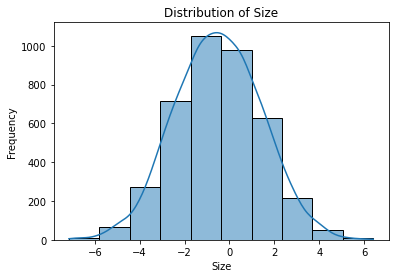

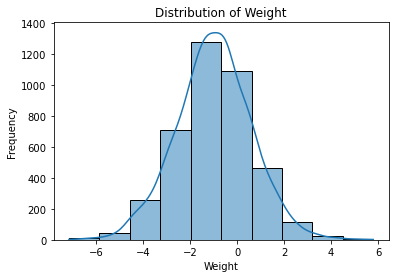

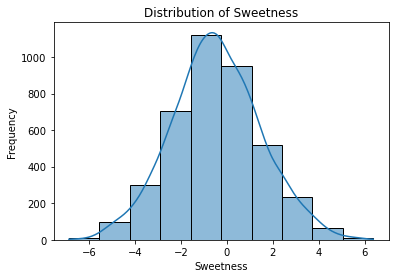

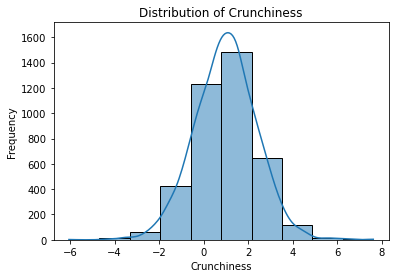

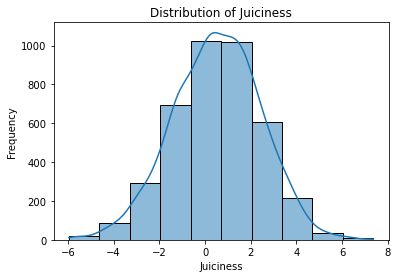

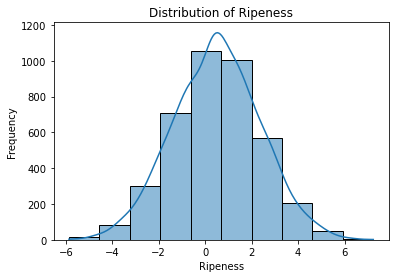

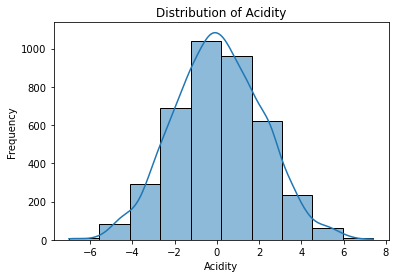

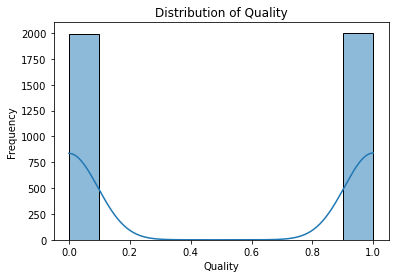

In [13]:
for column in apple_quality_cleaned.columns:
    sns.histplot(apple_quality_cleaned[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

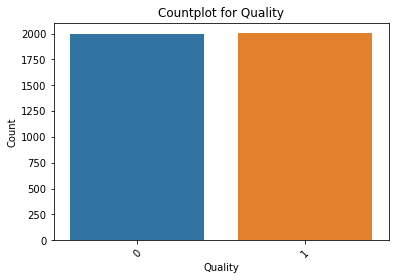

In [14]:
sns.countplot(data=apple_quality_cleaned, x='Quality')
plt.title('Countplot for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

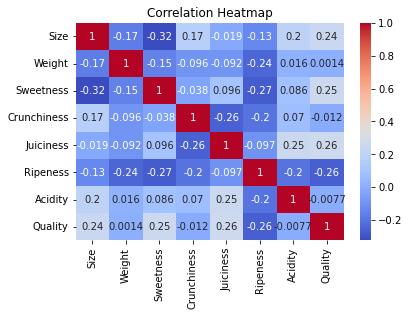

In [15]:
# Correlation Heatmap
corr_matrix = apple_quality_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

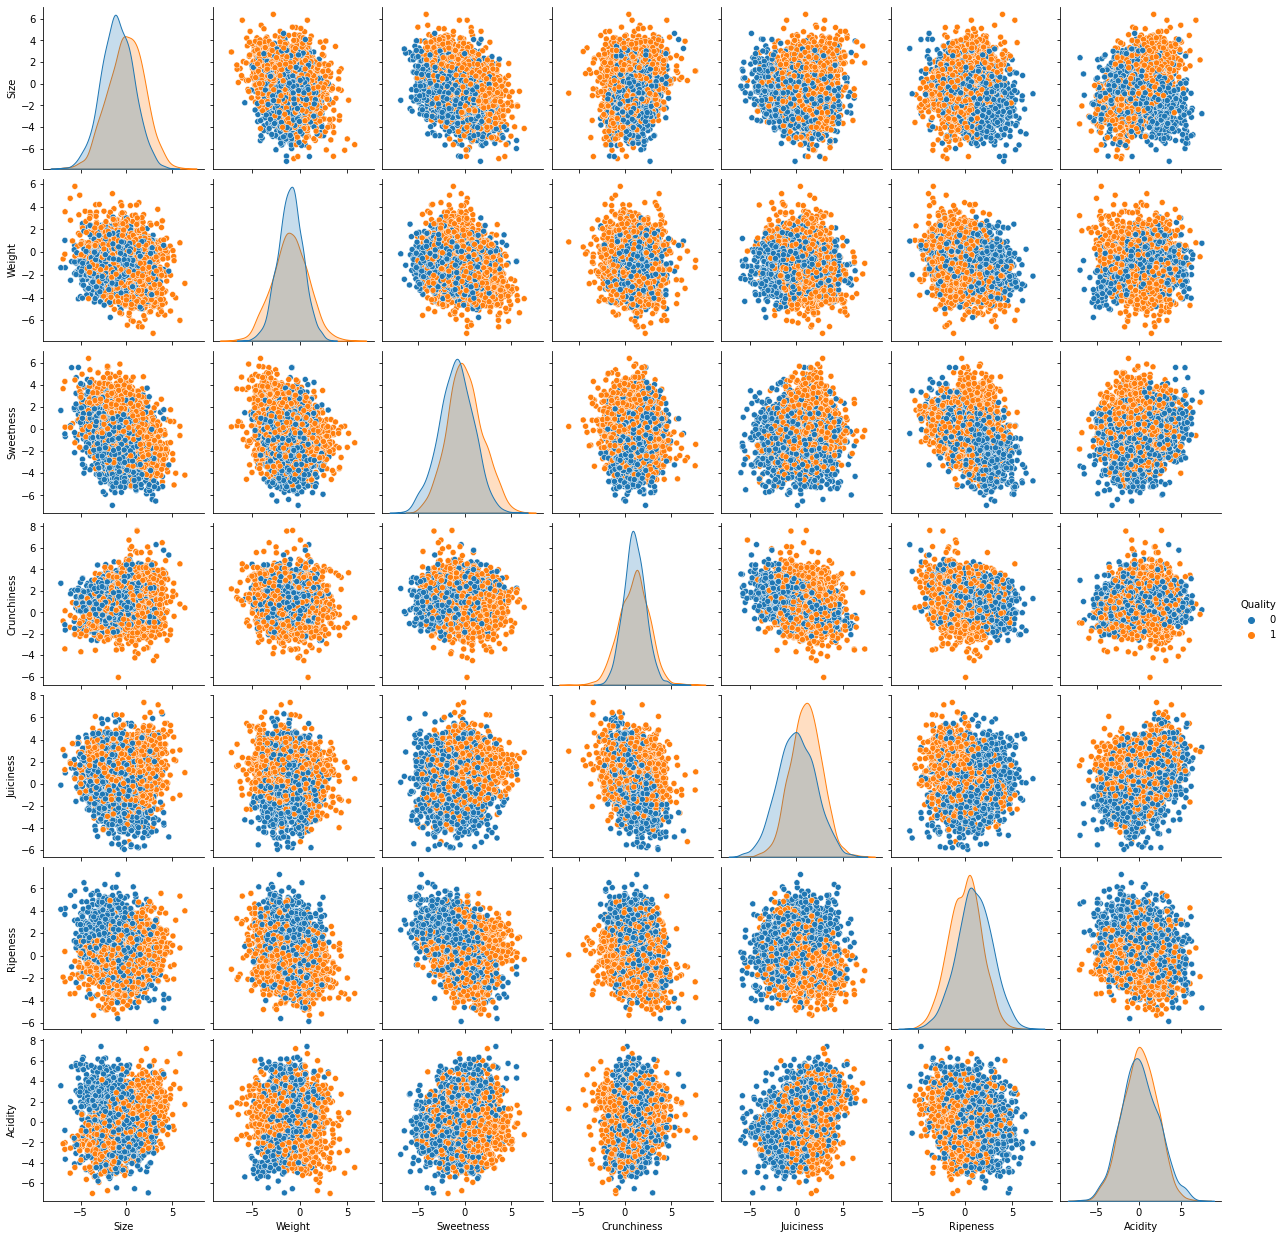

In [16]:
# Pairplot
sns.pairplot(apple_quality_cleaned, hue='Quality')
plt.show()

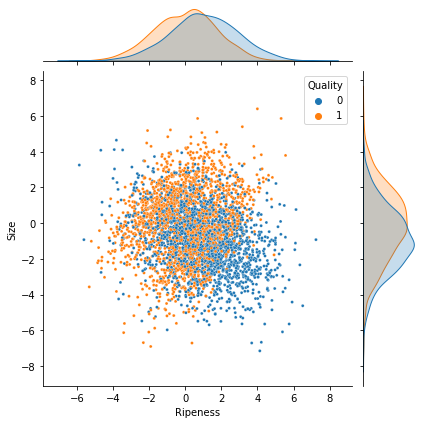

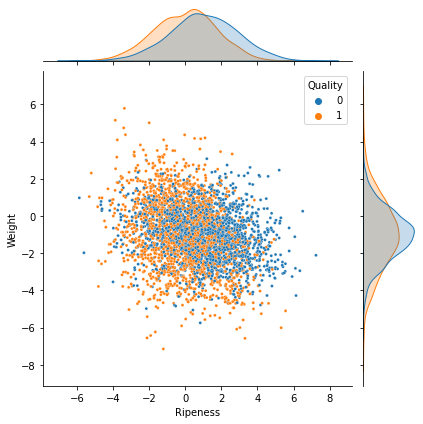

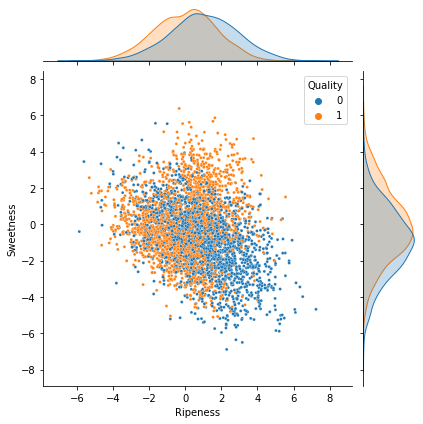

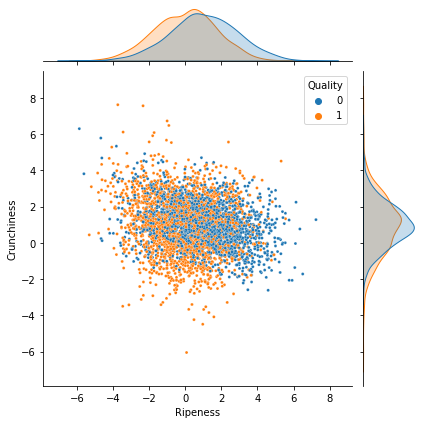

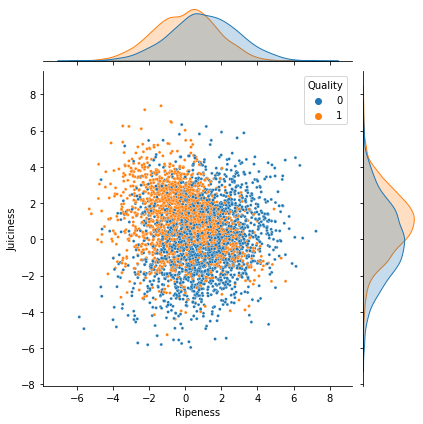

In [17]:
for column in apple_quality_cleaned.columns:
    if column == 'Quality' or column == 'Ripeness':
        break
    sns.jointplot(x='Ripeness', y=column, hue='Quality', data=apple_quality_cleaned, palette='tab10', s=9)
    plt.show()

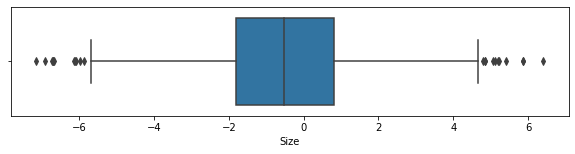

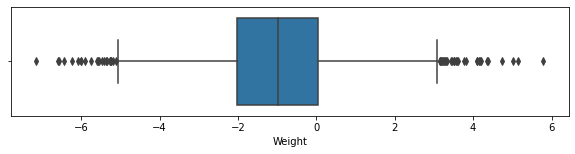

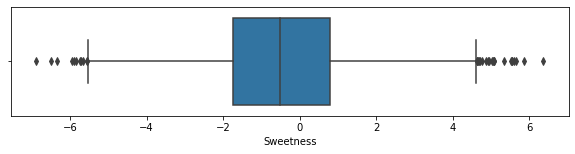

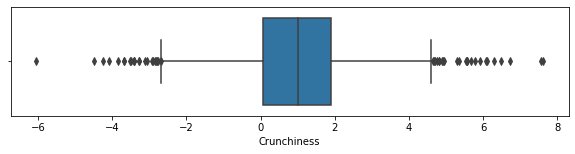

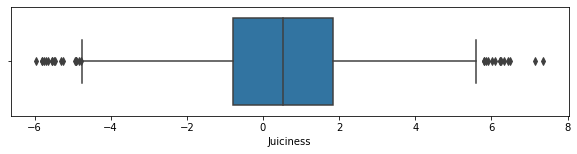

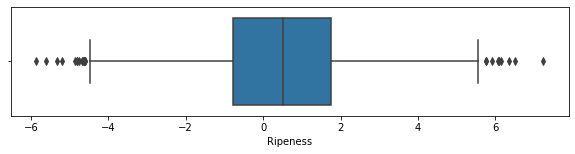

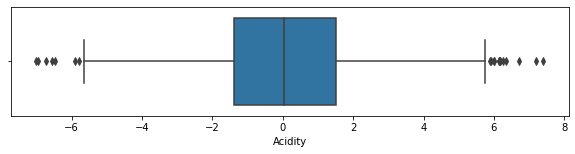

In [18]:
# Boxplot
for column in apple_quality_cleaned.columns:
    if column == 'Quality':
        break
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=column, data=apple_quality_cleaned)
    plt.show()

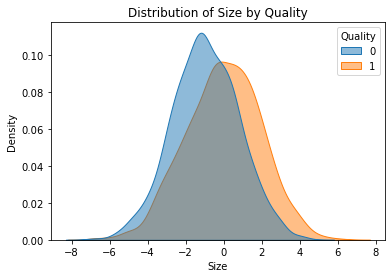

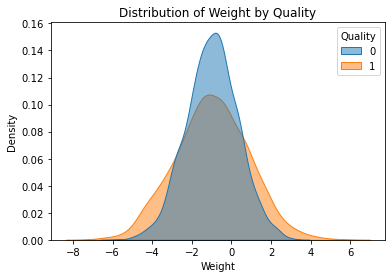

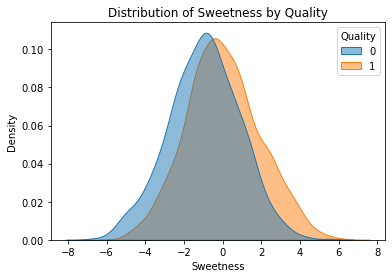

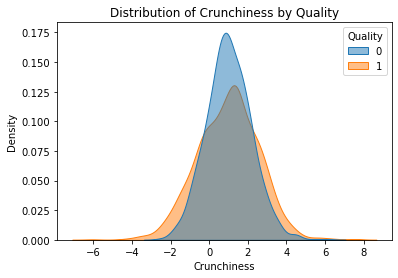

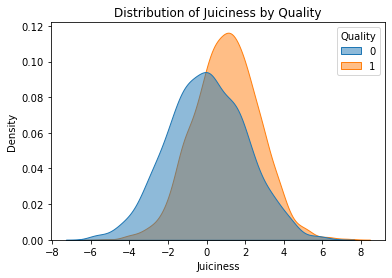

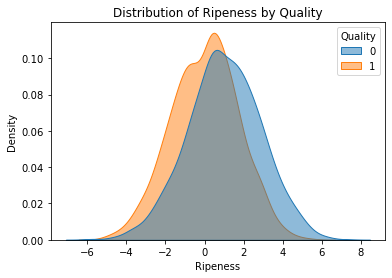

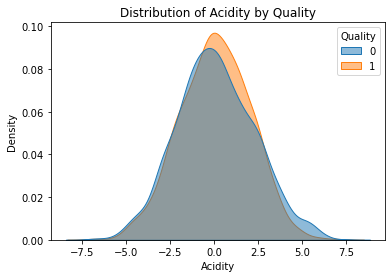

In [19]:
for column in apple_quality_cleaned.columns:
    if column == 'Quality':
        break
    sns.kdeplot(data=apple_quality_cleaned, x=column, hue='Quality', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column} by Quality')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

## Outlier removal

In [20]:
apple_quality_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 410.3 KB


In [21]:
# Remove outliers
Q1 = apple_quality_cleaned.quantile(0.25)
Q3 = apple_quality_cleaned.quantile(0.75)

In [22]:
df_no_outliers = pd.DataFrame()

for i in apple_quality_cleaned.columns:
    # Calculate the bounds for the current column
    lower_bound = Q1[i] - 1.5 * (Q3[i] - Q1[i])
    upper_bound = Q3[i] + 1.5 * (Q3[i] - Q1[i])
    
    # Filter out rows within the IQR range for the current column
    filtered_data = apple_quality_cleaned[(apple_quality_cleaned[i] >= lower_bound) & (apple_quality_cleaned[i] <= upper_bound)]
    
    # Assign filtered data to the new DataFrame
    df_no_outliers[i] = filtered_data[i]

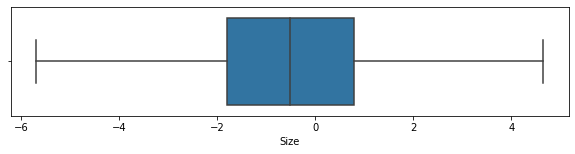

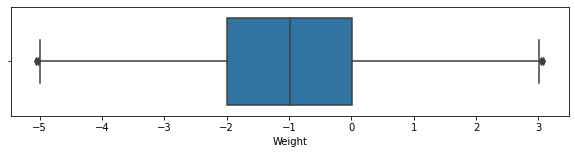

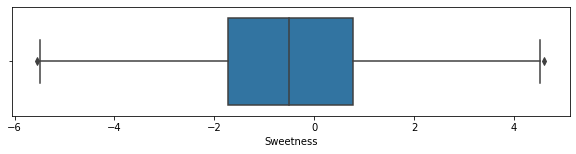

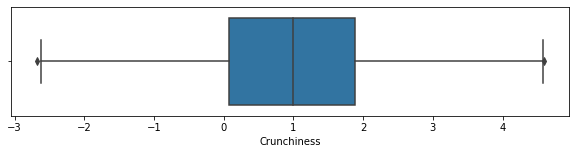

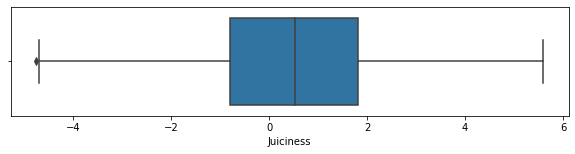

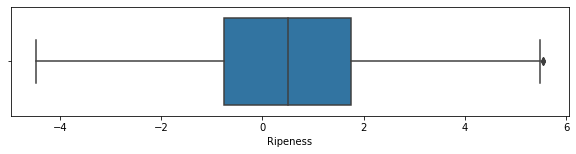

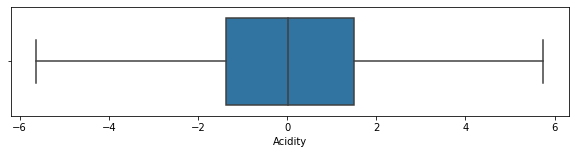

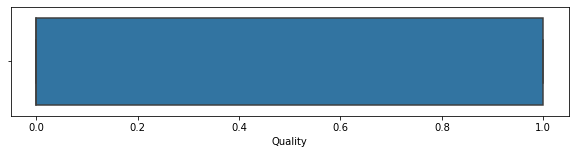

In [23]:
for column in df_no_outliers.columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df_no_outliers, x=column)
    plt.show()

In [24]:
#Fill NaN
df_no_outliers.fillna(df_no_outliers.mean(), inplace=True)

In [25]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3978 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3978 non-null   float64
 1   Weight       3978 non-null   float64
 2   Sweetness    3978 non-null   float64
 3   Crunchiness  3978 non-null   float64
 4   Juiciness    3978 non-null   float64
 5   Ripeness     3978 non-null   float64
 6   Acidity      3978 non-null   float64
 7   Quality      3978 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 279.7 KB


## Model preparation

In [26]:
#split data
X = df_no_outliers.drop("Quality", axis=1)
y = df_no_outliers.Quality
display(X.tail())
display(y.tail())

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796


3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, dtype: int64

In [27]:
#Scale the features
#sc = StandardScaler()
#sc.fit_transform(X)

In [28]:
#Split data in trainset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
#Calculate precision, recall and F1
def perf_metrics(y_pred):
    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)

## Random Forest

In [30]:
RF_model = RandomForestClassifier(n_estimators=250, random_state=42)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

In [31]:
perf_metrics(RF_predictions)

Precision: 0.8671209540034072
Recall: 0.8656462585034014
F1-score: 0.8663829787234042
Confusion Matrix:
[[528  78]
 [ 79 509]]


In [32]:
#optimize RF with hyperparameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'criterion': ['gini', 'entropy']
}
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='f1', verbose=True)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
Best Score: 0.8748199112165308


In [33]:
#Retrain RF model with best parameters
RF_model = RandomForestClassifier(**best_params)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

perf_metrics(RF_predictions)

Precision: 0.8641765704584041
Recall: 0.8656462585034014
F1-score: 0.8649107901444351
Confusion Matrix:
[[526  80]
 [ 79 509]]
